# Zadanie

Napisz (od podstaw) algorytm znajdowania minimum metodą gradientową.
Zaprezentuj jego działanie na przykładzie funkcji $f(x)=x^2$, startując z punktu $x=2$. Zilustruj całą sytuacje oznaczając na wykresie 5 pierwszych iteracji.

-5


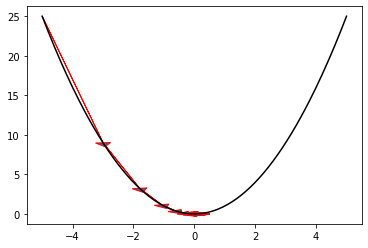

-5


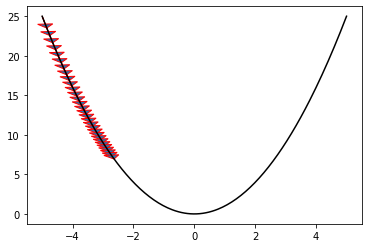

In [62]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: x**2

x = np.linspace(-5, 5, 200)
y = f(x)
plt.plot(x, y, 'k', ms=10);


def step_gradient_1d(x_current, learningRate):
    x_gradient = 2*x_current
    new_x = x_current - x_gradient*learningRate
    
    plt.arrow(x_current, f(x_current), - (learningRate * x_gradient), -(f(x_current)-f(new_x)),
              head_width=0.5, head_length=0.5,ec="red")
        
    return new_x
def gradient_descent_runner_1d(starting_x, learning_rate, num_iterations):
    x = starting_x
    print(x)
    for i in range(num_iterations):
        x = step_gradient_1d(x,learning_rate)
        #print(x)
    return x

learning_rate = 0.2
initial_x = -5 
num_iterations = 30
x = gradient_descent_runner_1d(initial_x, learning_rate, num_iterations)

plt.show()


learning_rate = 0.01
x = np.linspace(-5, 5, 200)
y = f(x)
plt.plot(x, y, 'k', ms=10);

x = gradient_descent_runner_1d(initial_x, learning_rate, num_iterations)
plt.show()


# Zadanie
Wykonaj powyższe zadania dla 
  * learning_rate = 0.001
  * learning_rate = 0.1
  * learning_rate = 0.2
  * learning_rate = 0.5
  * learning_rate = 0.9
  * learning_rate = 0.99
  * learning_rate = 0.999

In [81]:
def step_gradient_1d(x_current, learningRate, a, b):
    x_gradient = 2*x_current
    new_x = x_current - x_gradient*learningRate
    
    axs[a, b].arrow(x_current, f(x_current), - (learningRate * x_gradient), -(f(x_current)-f(new_x)),
              head_width=0.5, head_length=0.5,ec="red")
        
    return new_x

def gradient_descent_runner_1d(starting_x, learning_rate, num_iterations, a, b):
    x = starting_x
#     print(x)
    for i in range(num_iterations):
        x = step_gradient_1d(x,learning_rate,a,b)
        #print(x)
    return x


In [82]:
def get_axs(a, b, learning_rate):
    axs[a, b].set_title(str(learning_rate))
    x = np.linspace(-5, 5, 200)
    y = f(x)
    axs[a, b].plot(x, y)
    x = gradient_descent_runner_1d(initial_x, learning_rate, num_iterations, a, b)

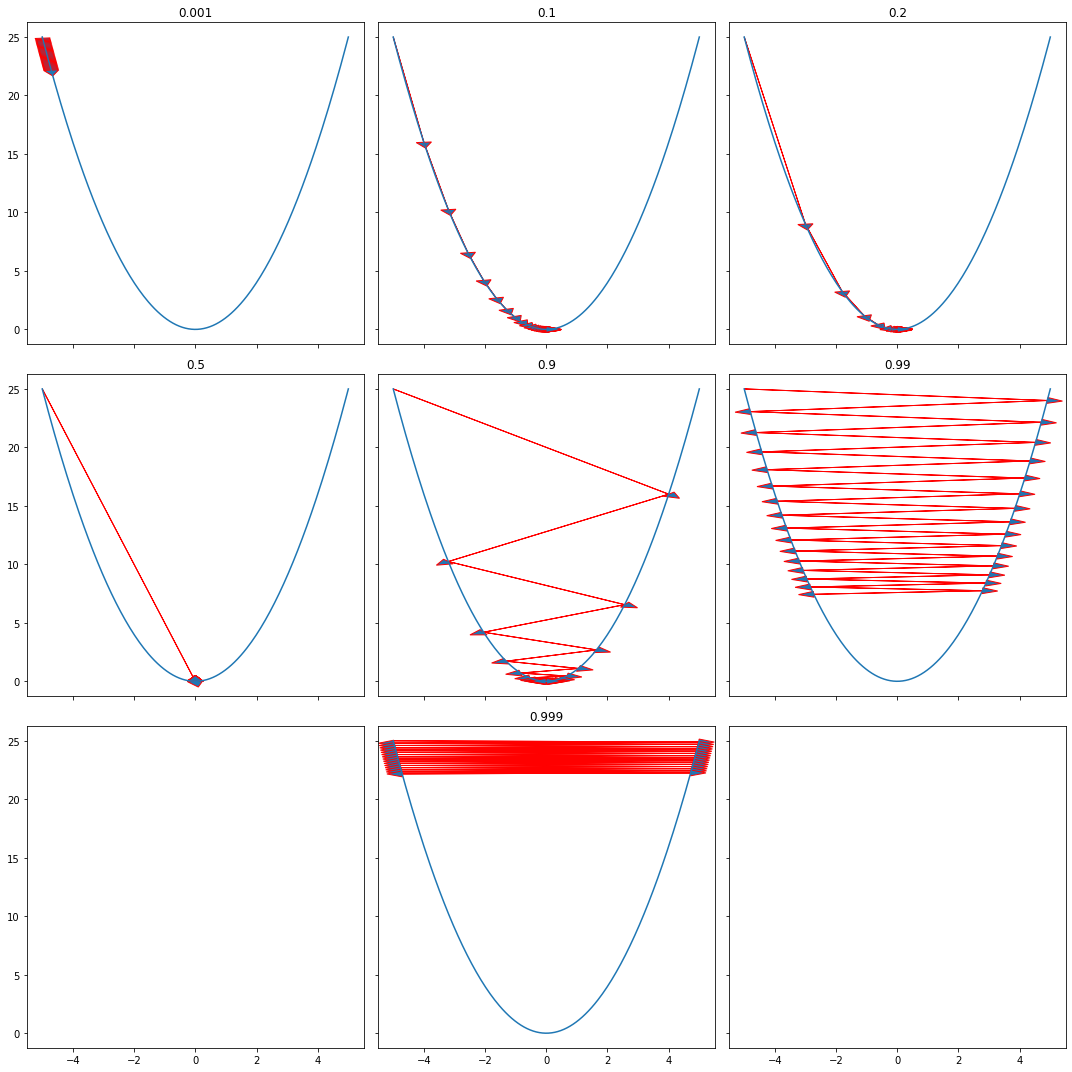

In [86]:
import matplotlib.pyplot as plt
import numpy as np
learning_rate = 0.2
initial_x = -5 
num_iterations = 30
x = np.linspace(-5, 5, 200)

fig, axs = plt.subplots(3, 3,sharex=True, sharey=True, squeeze=False,figsize=(15,15))
get_axs(0, 0, 0.001)
get_axs(0, 1, 0.1)
get_axs(0, 2, 0.2)
get_axs(1, 0, 0.5)
get_axs(1, 1, 0.9)
get_axs(1, 2, 0.99)
get_axs(2, 1, 0.999)


fig.tight_layout()
plt.show()

# Zadanie 2

Napisz (od podstaw) algorytm znajdowania minimum metodą gradientową.
Zaprezentuj jego działanie na przykładzie funkcji 

$$
f(x,y)=4*x^2-2x+y^2,
$$ 

startując z punktu $(x,y)=(2,2)$. Zilustruj całą sytuacje oznaczając na wykresie kilka pierwszych iteracji.
Wykonaj obrazek 3D.

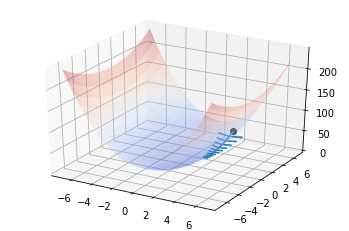

In [97]:
###########

import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
#%matplotlib notebook

plt.close('all')

fun = lambda x,y: 4*x**2+y**2

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-7, 7, 0.25)
Y = np.arange(-7, 7, 0.25)
X, Y = np.meshgrid(X, Y)
Z = fun(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0.01, antialiased=True, alpha=0.3)


#####################################

def step_gradient_2d(x_current, y_current, learningRate):
    x_gradient = 8*x_current - 2
    y_gradient = 2*y_current
    
    new_x = x_current - x_gradient*learningRate
    new_y = y_current - y_gradient*learningRate
    
    ax.quiver(x_current, y_current, (fun(x_current, y_current)) ,
              - (learningRate * x_gradient), - (learningRate * y_gradient), 
              (-(fun(x_current,y_current)-fun(new_x,new_y)))) 
    
    return [new_x, new_y]

def gradient_descent_runner_2d(starting_x, starting_y, learning_rate, num_iterations):
    x = starting_x
    y = starting_y
    for i in range(num_iterations):
        x, y = step_gradient_2d(x, y, learning_rate)
        #print(x, y)
    return [x, y]


learning_rate = 0.01
initial_x = 5 # initial y-intercept guess
initial_y = 0 # initial slope guess
num_iterations = 10
[x, y] = gradient_descent_runner_2d(initial_x, initial_y, learning_rate, num_iterations)


#####################################

plt.plot([initial_x],[initial_y],[fun(initial_x,initial_y)],"ok")
plt.show()
